In [1]:
# %cd /content
# ! rm -r competition

In [2]:
! git clone https://github.com/Tikquuss/competition

Cloning into 'competition'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 176 (delta 94), reused 123 (delta 41), pack-reused 0
Receiving objects: 100% (176/176), 40.44 MiB | 6.95 MiB/s, done.
Resolving deltas: 100% (94/94), done.
Updating files: 100% (21/21), done.


In [3]:
%cd competition/code

/content/competition/code


In [4]:
#!pip install -r ../requirements.txt

In [5]:
# Imports from our code
from data import  get_dataset
from utils import DATA_PATH, DIR_PATH_FIGURES, H, W
from plotter import show_example_images

# Others
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os

In [6]:
train_dataset, test_dataset, IDs_test = get_dataset(just_dataframe=True)

# (785-1)*2+1 = 1569
print(train_dataset.shape, test_dataset.shape)

print(Counter(pd.read_csv(os.path.join(DATA_PATH, "sample_submission.csv"))['label']))

(27455, 785) (3000, 1568)
Counter({'Y': 124, '\\': 111, 'V': 109, 'W': 107, 'Z': 107, ']': 103, 'U': 102, 'R': 100, 'S': 94, 'T': 92, 'P': 91, 'X': 90, '[': 90, 'M': 88, 'Q': 83, 'N': 81, 'O': 79, 'b': 77, '^': 75, '`': 70, 'I': 66, 'K': 66, 'H': 64, 'L': 63, 'G': 57, 'c': 57, 'J': 56, '_': 55, 'f': 54, 'a': 51, 'g': 51, 'e': 49, 'd': 49, 'F': 46, 'h': 42, 'j': 37, 'D': 34, 'E': 30, 'k': 29, 'i': 28, 'm': 27, 'C': 23, 'B': 20, 'n': 17, 'l': 16, 'A': 13, 'o': 10, 'q': 9, 'p': 8})


In [7]:
ct = Counter(train_dataset['label'])
print(min(ct.keys()), max(ct.keys()))
ct = dict(sorted(ct.items()))
s = sum(ct.values())
pr = {k : round(100*ct[k]/s, 3) for k in ct.keys()}
print(ct)
print(pr)
sum(pr.values())

0 24
{0: 1126, 1: 1010, 2: 1144, 3: 1196, 4: 957, 5: 1204, 6: 1090, 7: 1013, 8: 1162, 10: 1114, 11: 1241, 12: 1055, 13: 1151, 14: 1196, 15: 1088, 16: 1279, 17: 1294, 18: 1199, 19: 1186, 20: 1161, 21: 1082, 22: 1225, 23: 1164, 24: 1118}
{0: 4.101, 1: 3.679, 2: 4.167, 3: 4.356, 4: 3.486, 5: 4.385, 6: 3.97, 7: 3.69, 8: 4.232, 10: 4.058, 11: 4.52, 12: 3.843, 13: 4.192, 14: 4.356, 15: 3.963, 16: 4.659, 17: 4.713, 18: 4.367, 19: 4.32, 20: 4.229, 21: 3.941, 22: 4.462, 23: 4.24, 24: 4.072}


100.00100000000002

In [8]:
import string
x = list(string.ascii_uppercase.replace("J", "").replace("Z", ""))
y = list(ct.values())

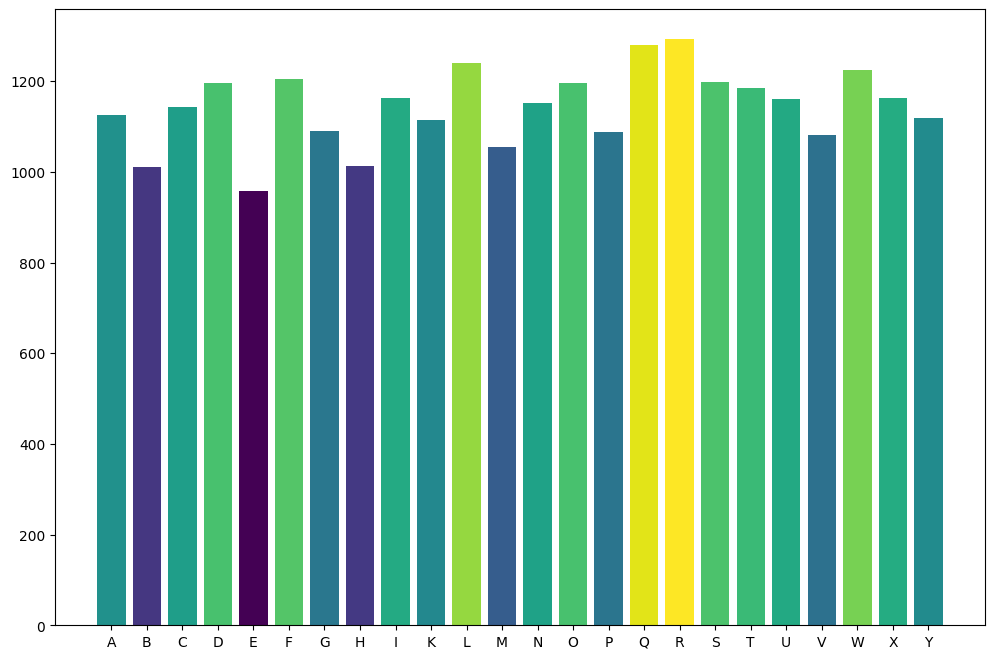

In [9]:
rows, cols = 1, 1
figsize = (6*2, 4*2)
figsize=(cols*figsize[0], rows*figsize[1])
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(rows, cols, 1)

#plt.bar(x, y, color=None)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(x, y, color=my_cmap(rescale(y)))


fileName=f"histogramm_classes"
plt.savefig(f"{DIR_PATH_FIGURES}/{fileName}"  + '.pdf', dpi=300, bbox_inches='tight', format='pdf')

plt.show()

0 255


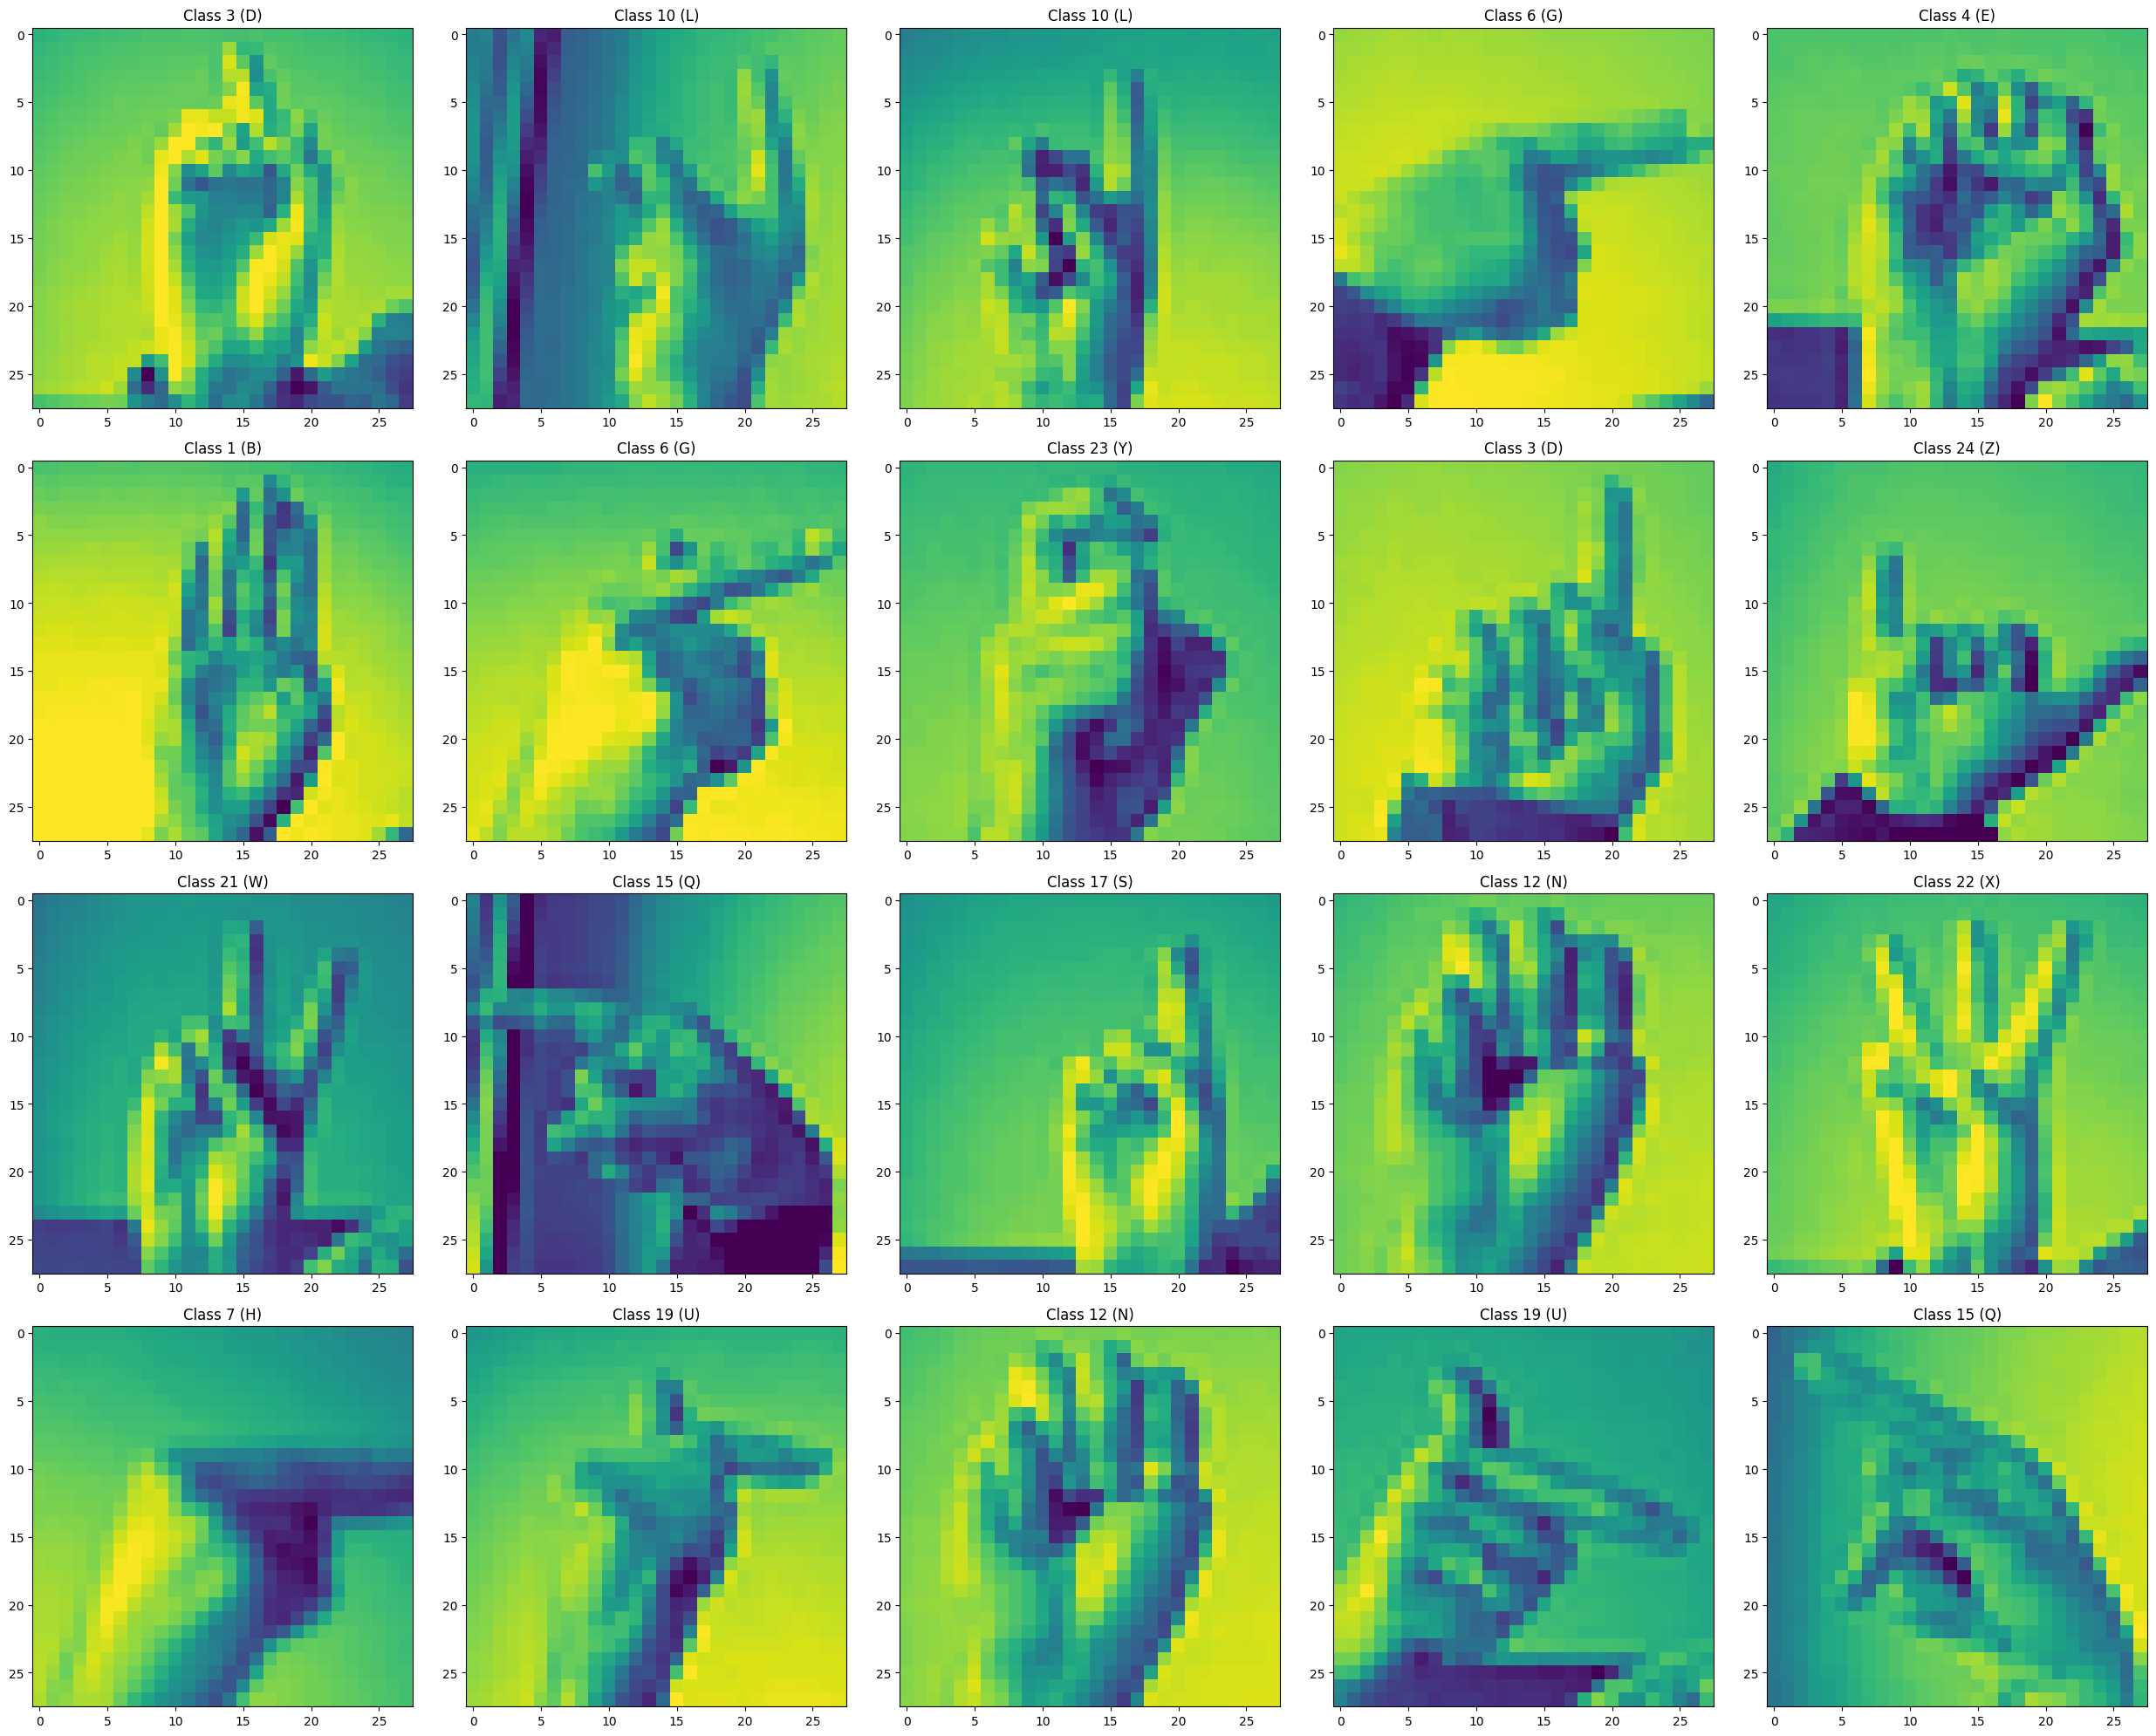

In [10]:
train_data = train_dataset.to_numpy()
X, Y = train_data[:,1:], train_data[:,0].astype(int)
print(X.min(), X.max())
_ = show_example_images(X.reshape(-1, H, W), Y, n_imgs=20, mono = 'viridis', fileName = "some_examples")

0 255 0 255


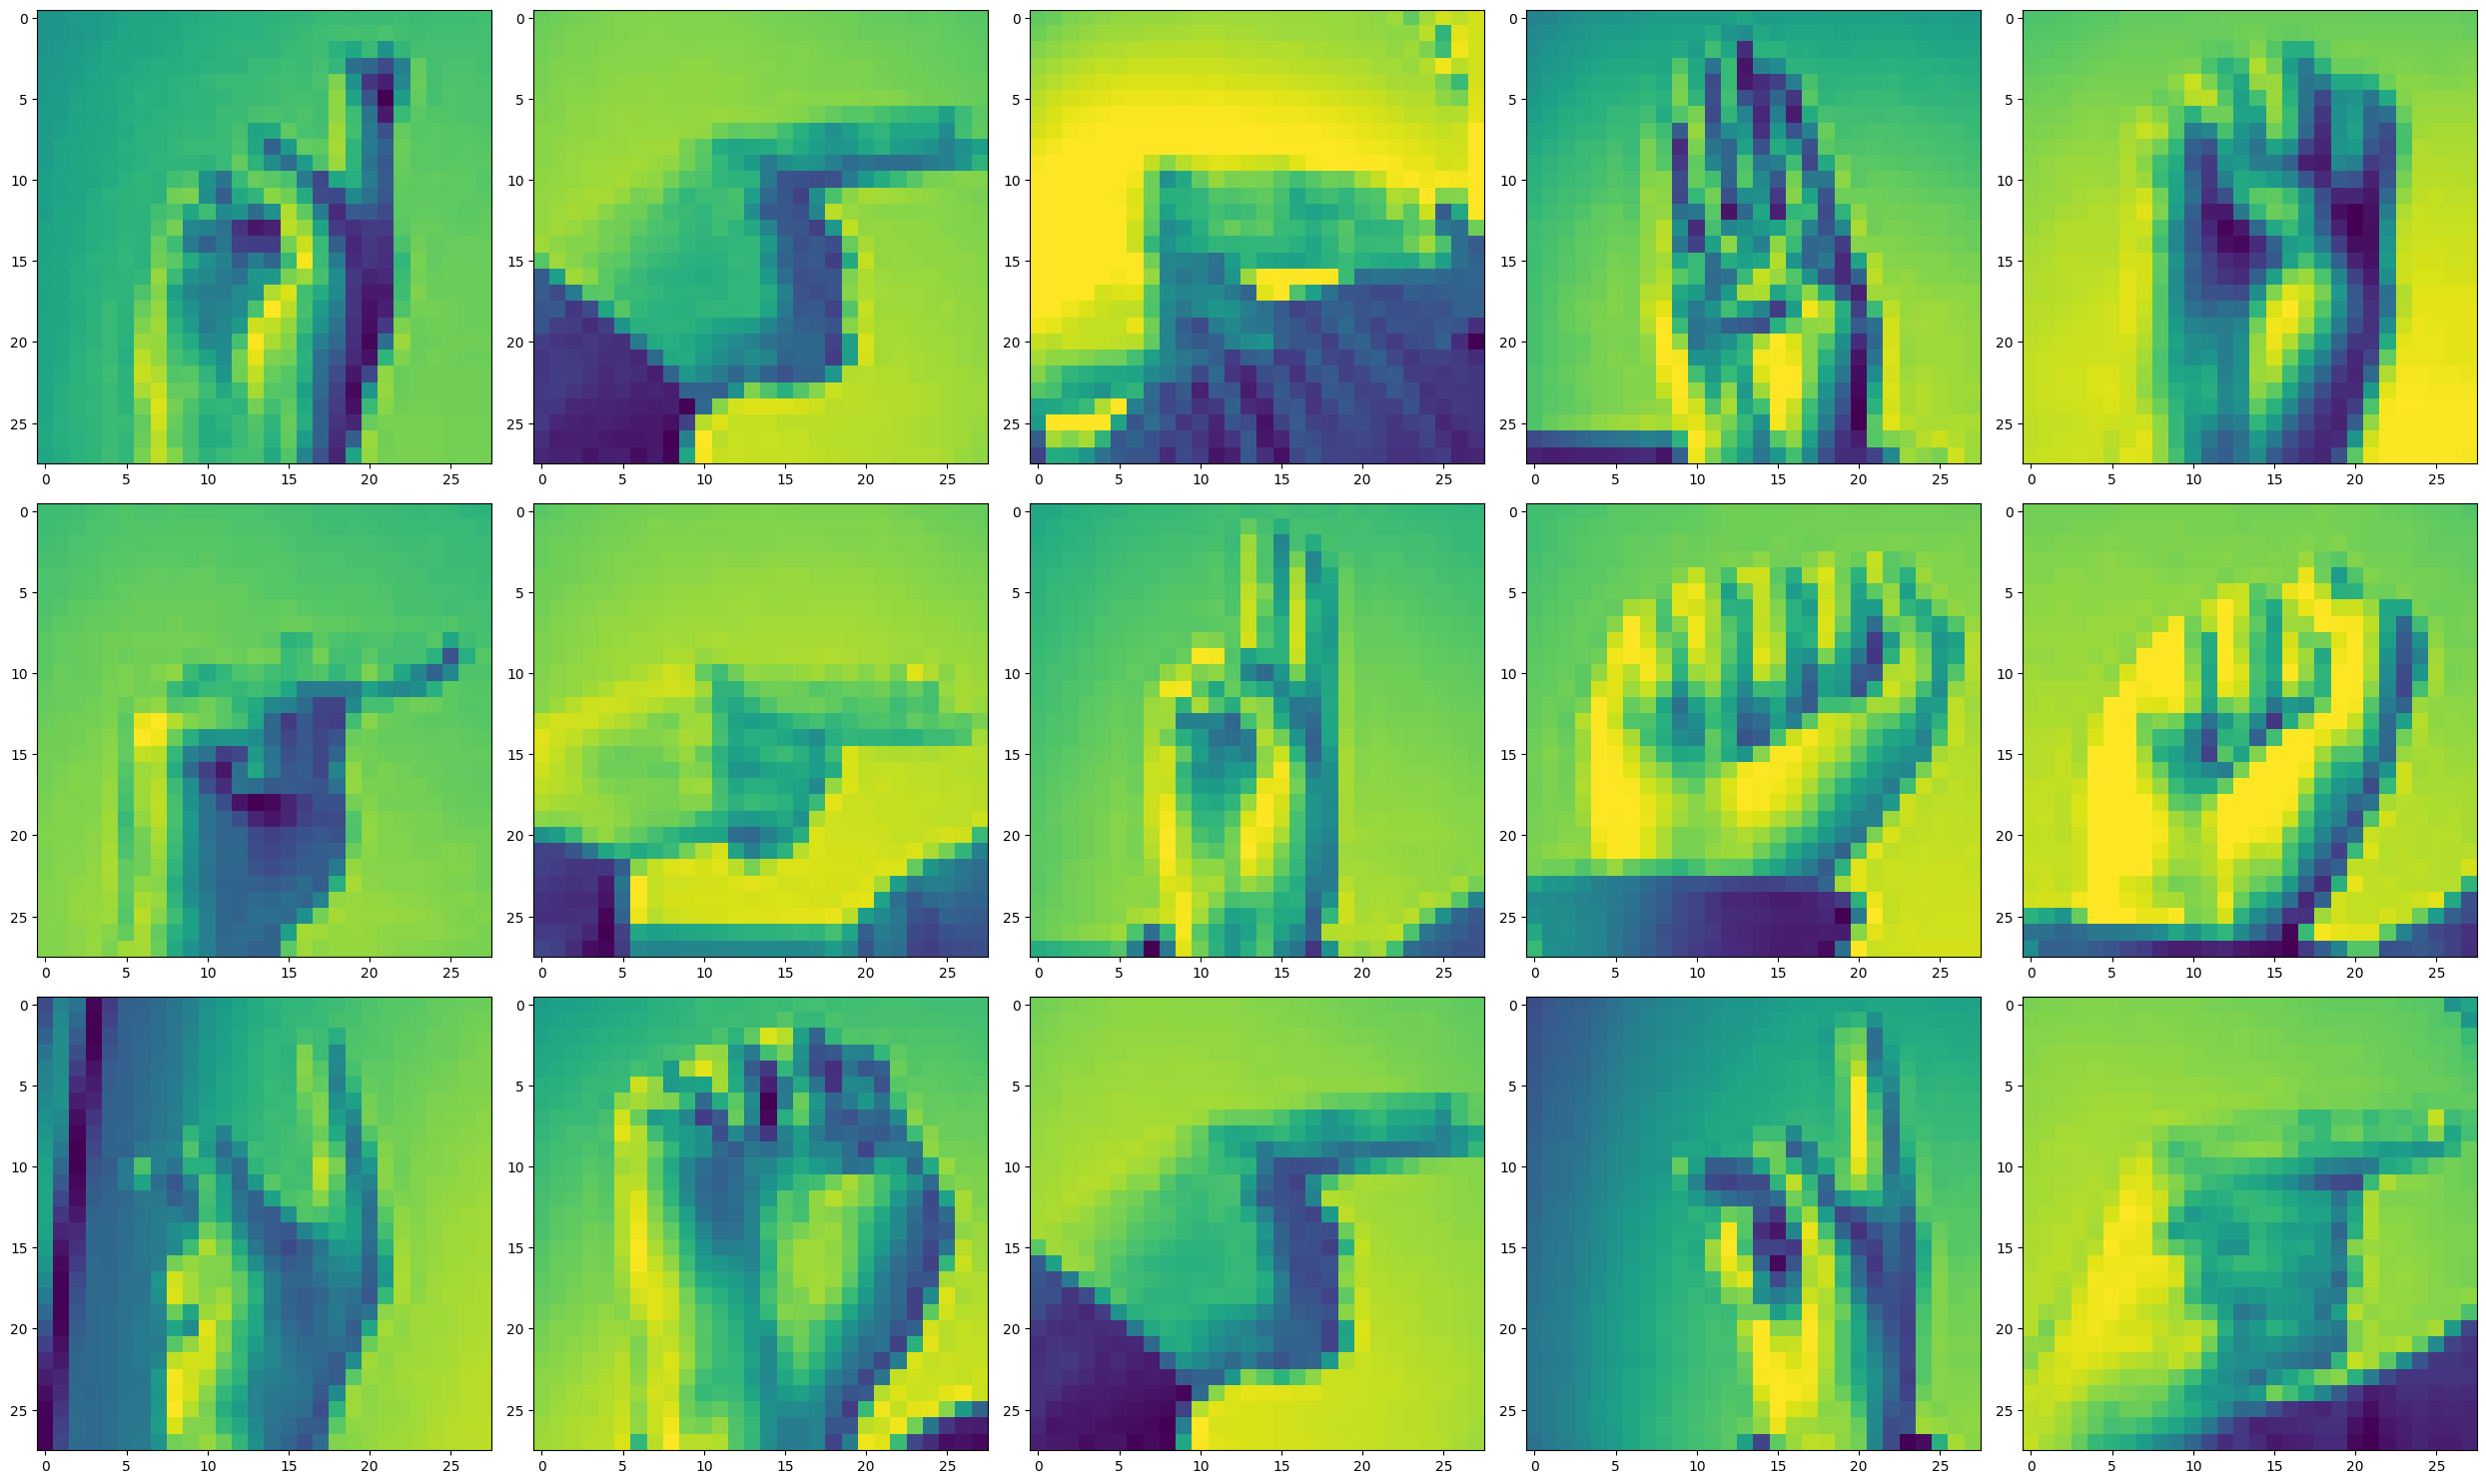

In [11]:
data = test_dataset.to_numpy()
X_A, X_B = data[:,:28*28], data[:,28*28:] # (n, d)
print(X_A.min(), X_A.max(), X_B.min(), X_B.max())
show_example_images(X_A.reshape(-1, H, W), Y=None, n_imgs=15, mono = 'viridis')